<a href="https://colab.research.google.com/github/ispineda/Bedu-Santander/blob/main/Python-Analytics/F3_S8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sesion 8: 

### Ejemplo 1: K-Medias

1. Objetivos:
    - Aprender a aplicar un algoritmo de K-Medias
    
---
    
2. Desarrollo:

Tenemos un dataset que contiene latitudes y longitudes de algunos crímenes cometidos en una región no especificada:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Remoto Datasets/Remoto crimenes_locacion.csv')

df.head()

,codigo_crimen,latitud,longitud
0,8,-15.068712,0.157991
1,0,-4.065913,12.491768
2,1,3.141179,-12.090601
3,8,8.806998,14.316892
4,3,-5.773641,15.487286


Vamos a visualizar los puntos geográficos formados por cada par de latitudes y longitudes:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


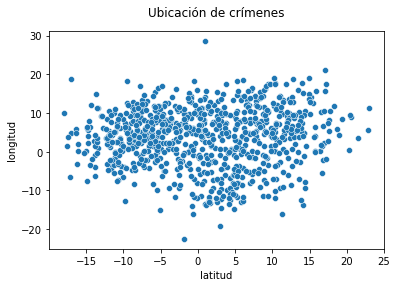

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Ubicación de crímenes', pad=15)
ax.set_xlabel('latitud')
ax.set_ylabel('longitud')

sns.scatterplot(df['latitud'], df['longitud'], ax=ax);

Digamos que queremos establecer algunos centros de vigilancia en esta región. Queremos que cada centro de vigilancia pueda atender efectivamente a la subregión que le toque vigilar. Para esto, tenemos que subdividir nuestra región en varias subregiones. No sabemos cómo se conforman esas subregiones, ni tampoco sabemos a qué subregión pertenecería cada una de las instancias de actividad delictiva.

Asumiendo que los patrones de actividad delictiva se mantienen más o menos constantes, podemos utilizar K-Medias para subdividir nuestra región en subregiones. Lo único que tenemos que elegir es cuántas subregiones queremos conformar. Esta decisión podría ser tomada con base en los recursos disponibles, por ejemplo. Si tuviéramos recursos para establecer 6 centros de vigilancia, entonces podemos crear 6 subregiones.

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
k_means = KMeans(n_clusters=6, max_iter=10000)

In [ ]:
k_means.fit(df[['latitud', 'longitud']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
centers = k_means.cluster_centers_

centers

array([[-5.39392643,  9.87928464],
       [-9.81481558,  0.8804643 ],
       [12.76415458,  4.51620396],
       [ 4.6243732 , -8.92529877],
       [ 1.28449279,  2.28543337],
       [ 8.11668921, 12.80728929]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


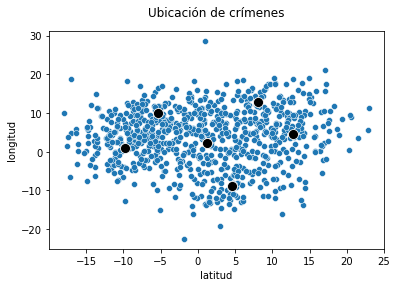

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Ubicación de crímenes', pad=15)
ax.set_xlabel('latitud')
ax.set_ylabel('longitud')

sns.scatterplot(df['latitud'], df['longitud'], ax=ax, palette='rainbow');
sns.scatterplot(centers[:,0], centers[:,1], ax=ax, s=100, color='black');

Vamos a clasificar nuestros datos para poder colorearlos y visualizar mejor las subregiones:

In [ ]:
clasificaciones = k_means.predict(df[['latitud', 'longitud']])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


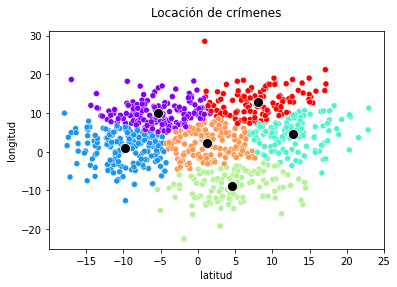

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Locación de crímenes', pad=15)
ax.set_xlabel('latitud')
ax.set_ylabel('longitud')

sns.scatterplot(df['latitud'], df['longitud'], ax=ax, hue=clasificaciones, palette='rainbow');
sns.scatterplot(centers[:,0], centers[:,1], ax=ax, s=100, color='black');

ax.get_legend().remove()

Subdiviendo nuestra región en estas 6 subregiones, tenemos cierta seguridad de que toda la actividad delictiva que sucede en la región podrá ser atendida efectivamente.

Si tuviéramos recursos para 9 centros de vigilancia, bastaría con realizar lo siguiente:

In [ ]:
k_means_9 = KMeans(n_clusters=9, max_iter=10000)

In [ ]:
k_means_9.fit(df[['latitud', 'longitud']])
centers_9 = k_means_9.cluster_centers_
clasificaciones_9 = k_means_9.predict(df[['latitud', 'longitud']])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


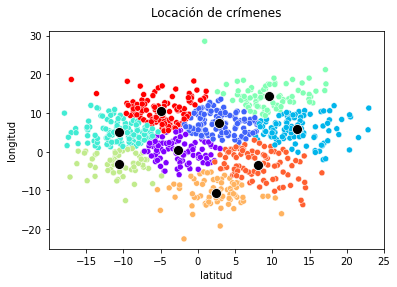

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Locación de crímenes', pad=15)
ax.set_xlabel('latitud')
ax.set_ylabel('longitud')

sns.scatterplot(df['latitud'], df['longitud'], ax=ax, hue=clasificaciones_9, palette='rainbow');
sns.scatterplot(centers_9[:,0], centers_9[:,1], ax=ax, s=100, color='black');

ax.get_legend().remove()

**¿Qué usos se te ocurren a ti para este algoritmo?**

### Ejemplo 2: Regresión Logística

1. Objetivos:
    - Aprender a aplicar un algoritmo de Regresión Logística
    
---
    
2. Desarrollo:

Tenemos el siguiente dataset con mediciones tomadas a diversos tumores de mama, junto con el diagnóstico que fue hecho. El diagnóstico puede ser 'M' para maligno y 'B' para benigno:

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Remoto Datasets/Remoto breast_cancer_wisconsin.csv', index_col=0)

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Primero que nada vamos a limpiar nuestro dataset un poco:

In [ ]:
df = df.drop(columns=['Unnamed: 32'])

In [ ]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

In [ ]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


Vamos a intentar entrenar un modelo de Regresión Logística para clasificar tumores como malignos o benignos.

In [ ]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
logreg = LogisticRegression(max_iter=10_000)

In [ ]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Ya que tenemos un modelo, podemos hacer predicciones utilizando el dataset de prueba:

In [ ]:
y_pred = logreg.predict(X_test)

y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1])

¿Cómo sabemos si esto es correcto o no? Bueno, LogisticRegression tiene un método `score` para obtener la exactitud del modelo:

In [ ]:
logreg.score(X_test, y_test)

0.9532163742690059

El score de este modelo se llama `mean accuracy` (exactitud promedio). Este valor puede encontrarse en un intervalo entre 0 y 1, con 1 siendo 'exactitud perfecta'. Como puedes ver este modelo es bastante exacto. Pero... ¿qué significa que un modelo de clasificación binaria sea exacto? ¿De dónde proviene este número?

### Ejemplo 3: Matriz de confusión

1. Objetivos:
    - Aprender a evaluar un modelo de clasificación binaria utilizando una matriz de confusión.
    
---
    
2. Desarrollo:

Entonces quedamos que una matriz de confusión se ve así:

In [ ]:
from IPython.display import Image
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

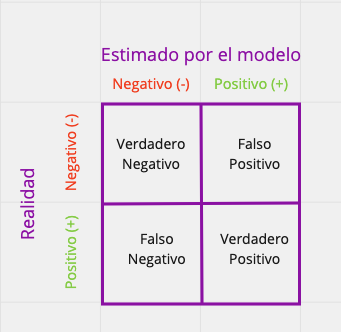

In [ ]:
Image('../Imgs/sesion_8-6.png')

Ésta es una matriz de 2x2, donde el eje x representa los resultados estimados por el modelo y el eje y representa la realidad (la clasificación que ya ha sido realizada en el dataset de prueba).

Como puedes ver, para cada uno de los dos ejes hay dos valores posibles: negativo y positivo. Negativo es la clasificación 0, el 'no'. Positivo es la clasificación 1, el `sí` (en nuestro ejemplo, positivo significa: 'el tumor es maligno').

Dependiendo de cuál es la etiqueta real (la que sabemos que es cierta) y cuál fue la que nuestro modelo estimó, hay 4 posibles categorías:

1. Verdadero Positivo (VP): Cuando la etiqueta real era positiva y nuestro modelo regresó un resultado positivo.
2. Falso Negativo (FN): Cuando la etiqueta real era positiva pero nuestro modelo regresó un resultado negativo.
3. Falso Positivo (FP): Cuando la etiqueta real era negativa pero nuestro modelo regresó un resultado positivo.
4. Verdadero Negativo (VN): Cuando la etiqueta real era negativa y nuestro modelo regresó un resultado negativo.

En estas 4 categorías se engloban todas las posibilidades. Obviamente queremos que la cantidad de Verdaderos Positivos y Verdaderos Negativos sea lo mayor posible. Volvamos a entrenar nuestro modelo para visualizar la matriz de confusión que le corresponde:

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Remoto Datasets/Remoto breast_cancer_wisconsin.csv', index_col=0)
df = df.drop(columns=['Unnamed: 32'])
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

In [ ]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logreg.predict(X_test)

Listo, vamos a obtener nuestra matriz de confusión y visualizarla:

In [ ]:
from sklearn import metrics

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[103,   1],
       [  8,  59]])

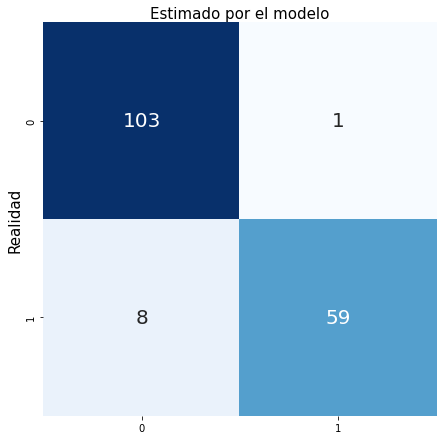

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

Una vez obtenida nuestra matriz de confusión, podemos utilizar 4 medidas de evaluación llamadas: Precisión (Precision), Exactitud (Accuracy), Sensibilidad (Recall / Sensitivity) y Especificidad (Specificity). Cada una mide un aspecto de nuestro modelo:

1. Precisión: De todas las clasificaciones positivas que hicimos, ¿cuántas de ésas eran en realidad positivas?

`precision = VP / (VP + FP)`

2. Exactitud: Del total de clasificaciones que hicimos, ¿cuántas fueron clasificadas correctamente?

`exactitud = (VP + VN) / (VP + FN + FP + VN)`

3. Sensibilidad: De todas las clasificaciones positivas que había en realidad, ¿cuántas fueron clasificadas correctamente como positivas?

`sensibilidad = VP / (VP + FN)`

4. Especificidad: De todas las clasificaciones negativas que había en realidad, ¿cuántas fueron clasificadas correctamente como negativas?

`especificidad = VN / (VN + FP)`

Todas estas medidas pueden tener valores entre 0 y 1. Entre más cerca del 1 estén, mejor es nuestro modelo. En nuestro ejemplo, éstas son las medidas que obtuvimos:

In [ ]:
tn, fp, fn, tp = cnf_matrix.ravel()

print("Precision:",metrics.precision_score(y_test, y_pred))
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))
print("Sensibilidad:",metrics.recall_score(y_test, y_pred))
print("Especificidad:", tn / (tn + fp))

Precision: 0.9833333333333333
Exactitud: 0.9473684210526315
Sensibilidad: 0.8805970149253731
Especificidad: 0.9903846153846154


¡Nuestro modelo es bastante bueno!

Aprendamos ahora de qué manera podemos visualizar también el desempeño de un modelo de clasificación.

### Ejemplo 4: Curva ROC / AUC

1. Objetivos:
    - Aprender a evaluar un modelo de clasificación binaria utilizando una curva ROC / AUC.
    
---
    
2. Desarrollo:

In [ ]:
from IPython.display import Image

Tenemos entonces que una curva ROC / AUC se ve así:

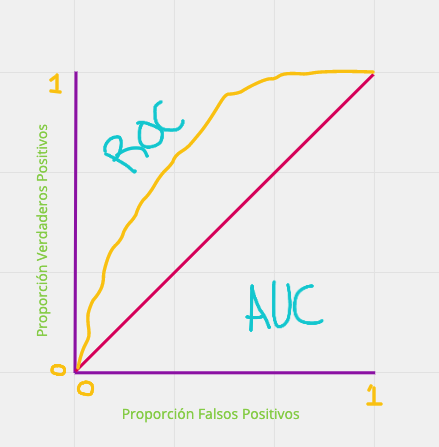

In [ ]:
Image('../Imgs/sesion_8-9.png')

El eje `y` representa la proporción de Verdaderos Positivos, que es lo mismo que la Sensibilidad.

El eje `x` representa la proporción de Falsos Positivos. Esto quiere decir: de todas las clasificaciones negativas que había en realidad, cuántas fueron clasificadas como positivas por nuestro modelo. Para obtener este valor, restamos el valor de Especificidad a 1 (`1 - especificidad`).

La curva ROC grafica el cambio en la proporción de Verdaderos Positivos contra la proporción de Falsos Positivos a través de diferentes *umbrales*.

La AUC (Area Under The Curve), o área debajo de la curva, es toda el área que se encuentra por debajo de la curva ROC. Podemos tener un valor entre 0 y 1.

Un valor de AUC cercano a 1, como el que podemos ver en el dibujo anterior, significa que nuestro modelo es muy bueno para diferenciar entre positivos y negativos. Además, es muy probable que elija el valor correcto.

Un valor de AUC cercano al 0.5 significa que nuestro modelo no puede diferenciar entre positivos y negativos. Un valor cercano al 0.5 se vería así:

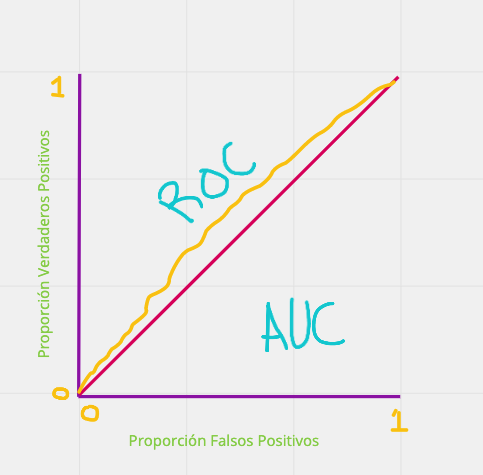

In [ ]:
Image('../Imgs/sesion_8-10.png')

Un valor cercano a 0 significa que nuestro modelo es muy bueno para diferenciar entre positivos y negativos **pero** elige casi siempre el valor contrario al real. O sea, elige positivos cuando debería de elegir negativos, y viceversa. Esta gráfica se vería así:

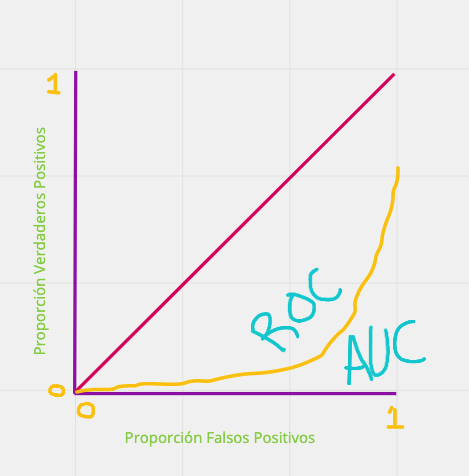

In [ ]:
Image('../Imgs/sesion_8-11.png')

Volvamos a entrenar nuestro modelo para evaluarlo con una curva ROC / AUC:

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('../../Datasets/breast_cancer_wisconsin.csv', index_col=0)
df = df.drop(columns=['Unnamed: 32'])
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

In [ ]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

La matriz de confusión requiere de resultados binarios, es decir 'correcto' o 'incorrecto', 'positivo' o 'negativo', como estos:

In [ ]:
y_pred = logreg.predict(X_test)

y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1])

Para graficar una curva ROC / AUC necesitamos resultados probabilísticos, como estos:

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)

y_pred_proba[:10,:]

array([[9.99095623e-01, 9.04377267e-04],
       [6.81672474e-09, 9.99999993e-01],
       [9.98908586e-01, 1.09141357e-03],
       [9.78468169e-01, 2.15318306e-02],
       [9.90975922e-01, 9.02407759e-03],
       [9.95919089e-01, 4.08091122e-03],
       [9.99023724e-01, 9.76276294e-04],
       [9.87411284e-01, 1.25887162e-02],
       [9.99971087e-01, 2.89131321e-05],
       [9.93076580e-01, 6.92341968e-03]])

En esta matriz, cada vector tiene dos valores. El primer valor es la probabilidad de que el valor sea negativo. El segundo valor es la probabilidad de que el valor sea positivo. Necesitamos los resultados de esta manera para poder modificar el umbral y obtener los puntos necesarios para generar la curva ROC.

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

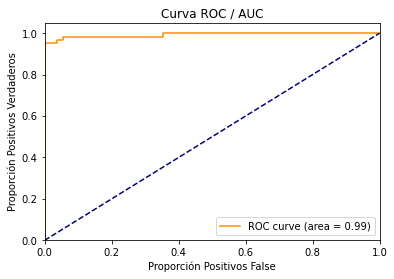

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Proporción Positivos False')
plt.ylabel('Proporción Positivos Verdaderos')
plt.title('Curva ROC / AUC')
plt.legend(loc="lower right")
plt.show()

Como era de esperarse, nuestro valor AUC es muy cercano al 1 (0.99). Esto significa que nuestro modelo puede diferenciar casi a la perfección entre negativos y positivos, y que además es muy probable que elija la clasificación correcta.

### Reto 1: K-Medias

### 1. Objetivos:
    - Aprender a aplicar un algoritmo de K-Medias
    
---
    
### 2. Desarrollo:

### Segmentación por subregiones de los usuarios de un producto

Tenemos un conjunto de datos llamado 'distribucion_usuarios.csv'. En este dataset tenemos las latitudes y longitudes de todos los usuarios de un producto que viven en una misma región. Como compañía, queremos establecer centros de servicio al cliente para atender todas las demandas de servicios en esta región. Vamos a utilizar el algoritmo K-Medias para segmentar nuestra región en subregiones. Cada subregión tendrá un centro de servicio en su centroide.

El dataset también contiene el código único de cada usuario y 4 columnas llamadas: 'producto_1', 'producto_2', 'producto_3', 'producto_4'. Estas columnas contienen un 1 en caso de que el usuario haya adquirido ese producto, y un 0 en caso de que el producto no haya sido adquirido.

Tu Reto consiste en lo siguiente:

1. Lee el dataset 'distribucion_usuarios.csv'.
2. Utiliza un scatterplot para visualizar las latitudes y longitudes de tu conjunto de datos.
3. Después utiliza la clase KMeans de `scikit-learn` para encontrar 7 centroides.
4. Ya que hayas encontrado tus centroides, crea una nueva visualización donde además de tus puntos, grafiques los 7 centros.
5. Ahora, utiliza tu modelo para clasificar tus puntos.
6. Después agrega segmentación por color a tu gráfica para que los puntos se coloreen de acuerdo al grupo al que pertenecen.
7. Ya que tienes tus puntos clasificados, agrega la clasificación al DataFrame original.
8. Ahora, segmenta tu DataFrame por grupo y obtén los siguientes datos:
    1. Cantidad total de usuarios por grupo
    2. Cantidades totales de producto 1, 2, 3 y 4 por grupo
9. Realiza una gráfica de barras para visualizar la cantidad de usuarios que hay en cada uno de los grupos
10. Finalmente, genera una gráfica de barras apiladas con los totales de productos adquiridos por grupo. Cada segmento de la barra será la cantidad de producto adquirido en un grupo en específico.
11. Comenta tus hallazgos con tus compañeros y la experta.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Remoto Datasets/Remoto distribucion_usuarios-1.csv')

df.head()

,codigo_de_usuario,producto_1,producto_2,producto_3,producto_4,latitud,longitud
0,1,0,0,0,0,14.277305,-5.958917
1,2,0,0,1,0,-9.958963,1.036839
2,3,0,0,1,0,7.859551,1.932572
3,4,1,1,1,1,-8.989976,6.969268
4,5,1,0,0,0,-6.641690,-0.777759


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


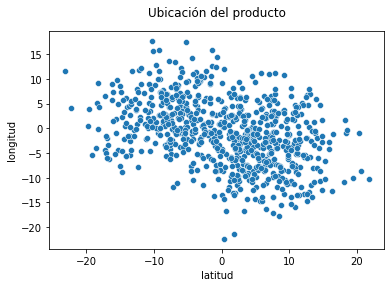

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Ubicación del producto', pad=15)
ax.set_xlabel('latitud')
ax.set_ylabel('longitud')

sns.scatterplot(df['latitud'], df['longitud'], ax=ax);

In [ ]:
k_means_7 = KMeans(n_clusters=7, max_iter=10000)

In [ ]:
k_means_7.fit(df[['latitud', 'longitud']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
centers = k_means_7.cluster_centers_

centers

array([[-14.50218331,   0.85843488],
       [ 12.602115  ,  -4.50540568],
       [  3.05575166,  -2.17165027],
       [ -6.35412715,   8.36004507],
       [  5.52573139, -10.82412276],
       [  7.24032885,   4.68397407],
       [ -5.62963967,  -0.96472713]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


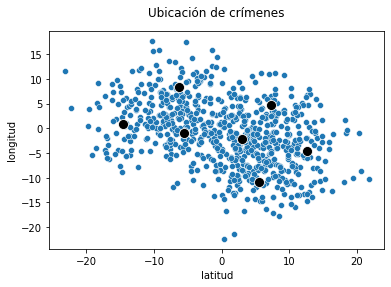

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Ubicación de crímenes', pad=15)
ax.set_xlabel('latitud')
ax.set_ylabel('longitud')

sns.scatterplot(df['latitud'], df['longitud'], ax=ax, palette='rainbow');
sns.scatterplot(centers[:,0], centers[:,1], ax=ax, s=100, color='black');

Vamos a clasificar nuestros datos para poder colorearlos y visualizar mejor las subregiones:

In [ ]:
clasificaciones = k_means_7.predict(df[['latitud', 'longitud']])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


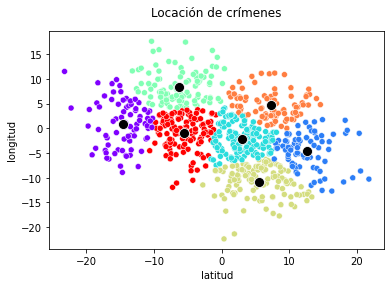

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Locación de crímenes', pad=15)
ax.set_xlabel('latitud')
ax.set_ylabel('longitud')

sns.scatterplot(df['latitud'], df['longitud'], ax=ax, hue=clasificaciones, palette='rainbow');
sns.scatterplot(centers[:,0], centers[:,1], ax=ax, s=100, color='black');

ax.get_legend().remove()

In [ ]:
df['clasificaciones'] = clasificaciones
df.head()

,codigo_de_usuario,producto_1,producto_2,producto_3,producto_4,latitud,longitud,clasificaciones
0,1,0,0,0,0,14.277305,-5.958917,1
1,2,0,0,1,0,-9.958963,1.036839,0
2,3,0,0,1,0,7.859551,1.932572,5
3,4,1,1,1,1,-8.989976,6.969268,3
4,5,1,0,0,0,-6.641690,-0.777759,6


In [ ]:
grup_counts = df['clasificaciones'].value_counts()
grup_counts

2    144
6    132
4    116
3    109
5     87
1     83
0     78
Name: clasificaciones, dtype: int64

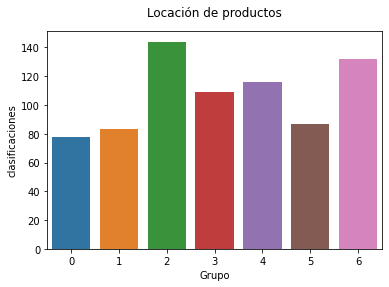

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Locación de productos', pad=15)
ax.set_xlabel('Grupo')
ax.set_ylabel('Conteo')

sns.barplot(x=grup_counts.index, y=grup_counts)
ax.get_legend()

In [ ]:
df_group_by = df.groupby('clasificaciones')['codigo_de_producto'].value_counts()
df_group_by

clasificaciones  codigo_de_producto
0                6                     16
                 3                     15
                 8                     13
                 1                     12
                 5                     12
                                       ..
6                2                      8
                 5                      8
                 3                      6
                 8                      6
                 6                      5
Name: codigo_de_producto, Length: 70, dtype: int64

## Reto 2: Regresión Logística

### 1. Objetivos:
    - Aprender a aplicar un algoritmo de Regresión Logística
    
---
    
### 2. Desarrollo:

Vamos a utilizar el dataset 'diabetes-clean.csv'. Si recuerdas, este dataset tiene datos de ciertas medidas biométricas tomadas de mujeres de ascendencia Pima. También se incluye la variable `outcome`, que indica si la paciente fue diagnosticada con diabetes o no. El 1 es un diagnóstico positivo (hay diabetes), mientras que el 0 es un diagnóstico negativo (no hay diabetes).

Vamos a entrenar un modelo de Regresión Logística para diagnosticar pacientes de manera automática. Tu Reto consiste en lo siguiente:

1. Lee el dataset 'diabetes-clean.csv'.
2. Realiza un pairplot (gráfica de pares) de tu conjunto de datos, donde cada scatterplot esté segmentado usando la categoría 'outcome'. Esto significa que los puntos en cada gráfica estarán coloreados de acuerdo a si corresponden al outcome 1 o 0. Puedes encontrar las instrucciones de cómo hacer eso [aquí](https://seaborn.pydata.org/generated/seaborn.pairplot.html).
3. Con tu gráfica de pares hecha, decide si realizar algo de limpieza en tus datos antes de entrenar el modelo. La limpieza puede consistir en eliminar algunos datos con valores atípicos o remover variables independientes que no creas que estén tan relacionadas con el resultado.
4. Utilizando `train_test_split` separa tu dataset en entrenamiento y prueba.
5. Entrena un modelo de `LogisticRegression` usando tu dataset de entrenamiento.
6. Obtén el score de exactitud de tu modelo.
7. Si crees que el score pueda mejorar, regresa al punto 3 y realiza algunos cambios antes de volver a entrenar al modelo.
8. Ya que estés satisfecho con los resultados, comenta tus hallazgos con tus compañeros y la experta.

## Reto 4: Curva ROC / AUC

### 1. Objetivos:
    - Aprender a evaluar un modelo de clasificación binaria utilizando una curva ROC / AUC.
    
---
    
### 2. Desarrollo:

Ahora, vamos a evaluar nuestro mismo modelo utilizando una curva ROC / AUC. Tu Reto consiste en lo siguiente:

1. Copia el código del Reto anterior a este Reto, de manera que tengas un modelo entrenado que sea similar.
2. Esta vez, realiza las clasificaciones de tu dataset de prueba de manera que obtengas probabilidades en vez de resultados binarios.
3. Obtén la proporción de Verdaderos Positivos y de Falsos Positivos utilizando el método `roc_curve` de `sklearn.metrics`.
4. Obtén el valor de AUC usando el método `auc` de `sklearn.metrics`.
5. Grafica tu curva ROC / AUC para visualizar el desempeño de tu modelo.

> **Reto extra**: Para un reto extra, obtén las series de proporciones de Verdaderos Positivos y de Falsos Positivos sin utilizar los métodos de `sklearn`. Esto es un reto bastante difícil, pero si te interesa practicar tus habilidades al máximo, pídele a la experta que te ayude a entender cómo lograr esto.

## Reto 3: Matriz de Confusión

### 1. Objetivos:
    - Aprender a evaluar un modelo de clasificación binaria utilizando una matriz de confusión
    
---
    
### 2. Desarrollo:

En este Reto vamos a utilizar una matriz de confusión para evaluar el modelo que entrenamos en el Reto anterior. Tu Reto consiste en los siguientes pasos:

1. Copia el código del Reto anterior a este Reto, de manera que tengas un modelo entrenado que sea similar.
2. Obtén tu matriz de confusión utilizando `sklearn.metrics.confusion_matrix`.
3. Usando un mapa de calor (heatmap), grafica tu matriz de confusión de manera que sea muy claro y evidente lo que está pasando. Recuerda modificar tus estilos para que sean agradables a la vista.
4. Utilizando la matriz de confusión, obtén las medidas de Precisión, Exactitud, Sensibilidad y Especificidad. Evalúa tu modelo utilizando estas medidas.

> **Reto extra**: Para un reto extra, obtén las medidas del punto 4 sin utilizar los métodos `sklearn.metrics`. Recuerda que todas tus medidas de evaluación las puedes obtener usando aritmética simple y tu matriz de confusión.